In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
with open('/content/gdrive/My Drive/file.txt', 'w') as f:
  f.write('content')

In [ ]:
!cp X_train.csv "/content/gdrive/MyDrive/Colab Notebooks"

In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from itertools import product
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
train = pd.read_csv("sales_train.csv",parse_dates=["date"])  # Parsing date in datetime format
test = pd.read_csv("test.csv")
shops = pd.read_csv("shops.csv")
items = pd.read_csv("items.csv")
item_categories = pd.read_csv("item_categories.csv")

In [ ]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [ ]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [ ]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [ ]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-02-01,0,59,22154,999.00,1.0
1,2013-03-01,0,25,2552,899.00,1.0
2,2013-05-01,0,25,2552,899.00,-1.0
3,2013-06-01,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [ ]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [ ]:
shops_translated= pd.read_csv("shops_translated.csv")
items_translated = pd.read_csv("items_translated.csv")
item_categories_translated = pd.read_csv("categories_translated.csv")

In [ ]:
item_categories_translated.head()

,category_name,category_id
0,PC - Headsets / Headphones,0
1,Accessories - PS2,1
2,Accessories - PS3,2
3,Accessories - PS4,3
4,Accessories - PSP,4


In [ ]:
items_translated.head()

,item_id,category_id,item_name
0,0,40,!! IN THE POWER OF HAPPINESS (PLAST) D
1,1,76,! ABBYY FineReader 12 Professional Edition Ful...
2,2,40,*** IN THE GLORY OF THE GLORY (UNV) D
3,3,40,*** BLUE WAVE (Univ) D
4,4,40,*** BOX (GLASS) D


In [ ]:
shops_translated.head()

,shop_name,shop_id
0,"! Yakutsk Ordzhonikidze, 56 francs",0
1,"! Yakutsk TC ""Central"" fran",1
2,"Adygea TC ""Mega""",2
3,"Balashikha TC ""Oktyabr-Kinomir""",3
4,"Volga TC ""Volga Mall""",4


## **Exploring the data**

In [ ]:
print("No. of shops: ",len(shops))
print("No. of item categories: ",len(item_categories))
print("No. of items: ",len(items))
print("No. of train data: ",len(train))
print("No. of test data: ",len(test))

No. of shops:  60
No. of item categories:  84
No. of items:  22170
No. of train data:  2935849
No. of test data:  214200


In [ ]:
shops.nunique()

shop_name    60
shop_id      60
dtype: int64

In [ ]:
items.nunique()

item_name           22170
item_id             22170
item_category_id       84
dtype: int64

In [ ]:
item_categories.nunique()

item_category_name    84
item_category_id      84
dtype: int64

In [ ]:
train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   date_block_num  int64         
 2   shop_id         int64         
 3   item_id         int64         
 4   item_price      float64       
 5   item_cnt_day    float64       
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 134.4 MB


In [ ]:
# Missing Values 
train.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [ ]:
train.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


### **Data Visualization**

In [ ]:
px.histogram(items[['item_category_id','item_id']], x='item_category_id',title='Distribution of items in category').update_xaxes(dtick=True)

In [ ]:
total_shop_sales = pd.DataFrame(train.groupby(['shop_id'])['item_cnt_day','item_price'].sum().sort_values(by='item_price',ascending=False).reset_index())
#total_shop_sales.head()

px.bar(total_shop_sales,x='shop_id',y='item_price',title='Total shopwise sales').update_xaxes(type="category",categoryorder='total descending')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
shops_daily_sales = pd.DataFrame(train.groupby(['date','shop_id'])['item_cnt_day','item_price'].sum().reset_index())
#shops_daily_sales.head()
px.line(shops_daily_sales,x='date',y='item_cnt_day' ,color='shop_id',title='Daily sales of shops')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
item_prices = pd.DataFrame(train.groupby(['item_id','item_price']).first()).reset_index()[['item_id','item_price']]
px.line(item_prices,x='item_id', y='item_price')

Clearly there are some outliers in item price and item count that needs to be treated.

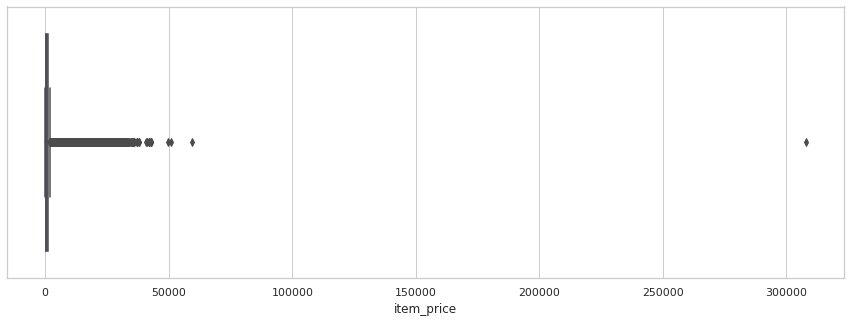

In [ ]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,5))
sns.boxplot(x=train.item_price)

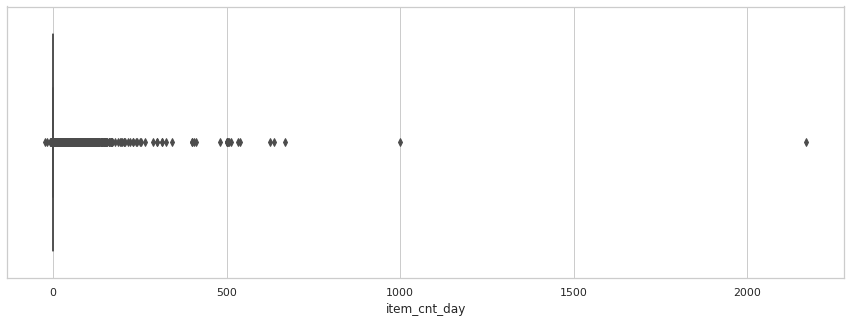

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x=train.item_cnt_day)

In [ ]:
# Removing outliers
train = train[train.item_price<100000]
train = train[train.item_cnt_day<1001]

We can also see there are some -ve item price and item counts

In [ ]:
train.describe().loc['min']

date_block_num     0.0
shop_id            0.0
item_id            0.0
item_price        -1.0
item_cnt_day     -22.0
Name: min, dtype: float64

In [ ]:
train[train.item_price<0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,2013-05-15,4,32,2973,-1.0,1.0


In [ ]:
train[train.item_cnt_day<0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2,2013-05-01,0,25,2552,899.0,-1.0
148,2013-01-23,0,25,2321,999.0,-1.0
175,2013-07-01,0,25,2199,1449.0,-1.0
807,2013-02-01,0,25,2330,599.0,-1.0
1041,2013-01-13,0,25,5034,1989.0,-1.0
...,...,...,...,...,...,...
2934243,2015-10-26,33,25,3917,449.0,-1.0
2934462,2015-10-18,33,25,4896,6398.0,-1.0
2935263,2015-05-10,33,25,10039,249.0,-1.0
2935643,2015-10-16,33,25,7893,2990.0,-1.0


In [ ]:
negprice=train[train.item_price<0].index

In [ ]:
negcnt = train[train.item_cnt_day<0].index

Making negative values null and imputing them using sklearn KNNImputer

In [ ]:
# Making -ve values to null to use KNNImputer
# train.loc[train[train.item_price<0].index,'item_price'] = None
# train.loc[train[train.item_cnt_day<0].index,'item_cnt_day'] = None

In [ ]:
from sklearn.impute import KNNImputer

# # k-Nearest Neighbour Imputation object
# knn_imputer = KNNImputer(n_neighbors = 2)

In [ ]:
# imputed_rows = knn_imputer.fit_transform(train.iloc[:,1:]) # Datetime row gives conversion error, not necessary as we have month data

In [ ]:
# train_imputed=pd.DataFrame(imputed_rows,columns=['date_block_num',	'shop_id',	'item_id',	'item_price',	'item_cnt_day'])

In [ ]:
# train=train.reset_index()

In [ ]:
# train_imputed['date']=train.date

In [ ]:
# train_imputed

In [ ]:
# ********************
imputed_rows = pd.read_csv('imputed_rows.csv')
# imputed_rows

In [ ]:
# *********************
train_imputed = imputed_rows
train_imputed.columns=['date_block_num',	'shop_id',	'item_id',	'item_price',	'item_cnt_day']
train=train.reset_index()
train_imputed['date']=train.date

In [ ]:
train_imputed

,date_block_num,shop_id,item_id,item_price,item_cnt_day,date
0,0.0,59.0,22154.0,999.00,1.0,2013-02-01
1,0.0,25.0,2552.0,899.00,1.0,2013-03-01
2,0.0,25.0,2552.0,899.00,1.0,2013-05-01
3,0.0,25.0,2554.0,1709.05,1.0,2013-06-01
4,0.0,25.0,2555.0,1099.00,1.0,2013-01-15
...,...,...,...,...,...,...
2935842,33.0,25.0,7409.0,299.00,1.0,2015-10-10
2935843,33.0,25.0,7460.0,299.00,1.0,2015-09-10
2935844,33.0,25.0,7459.0,349.00,1.0,2015-10-10
2935845,33.0,25.0,7440.0,299.00,1.0,2015-09-10


In [ ]:
train_imputed.isnull().sum()

date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
date              0
dtype: int64

**Total Items sold in a month**

In [ ]:
# Total Items sold in a month
total_monthly_sales = pd.DataFrame(train_imputed.groupby('date_block_num')['item_cnt_day','item_price'].sum().reset_index())
total_monthly_sales['months']=pd.date_range('2013-01-01','2015-10-01', freq='MS').strftime("%Y-%b").tolist()
#total_monthly_sales.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
from plotly.subplots import make_subplots

# Create figure with secondary y-axis, ref: https://plotly.com/python/multiple-axes/
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=total_monthly_sales.months,y=total_monthly_sales.item_cnt_day, name='No. of Items Sold', line=dict(color='Red')))
fig.add_trace(go.Scatter(x=total_monthly_sales.months,y=total_monthly_sales.item_price, name='Item sales', line=dict(color='blue')), secondary_y=True)

fig.update_yaxes(title_text='No. of Items Sold', secondary_y=False)
fig.update_yaxes(title_text='Item sales', secondary_y=True)
fig.update_layout(title_text='Monthly items sold and sales', title_x=0.5)
fig.show()

Above graph shows monthly no. items sold and sales made by all shops combined.

We can see there is seasonality in the sales trend. The sales seems to peak in the year end, and then follows a decreasing trend.

### **Feature Engineering**

#### Feature extraction from **Item Categories** 

After inspecting Item Category names, we can see that category names have a main category and a sub category separated by '-'. We can use this as separator and extract first part as group_name

In [ ]:
item_categories_translated

,category_name,category_id
0,PC - Headsets / Headphones,0
1,Accessories - PS2,1
2,Accessories - PS3,2
3,Accessories - PS4,3
4,Accessories - PSP,4
...,...,...
79,Service,79
80,Service - Tickets,80
81,Blank media (spire),81
82,Blank media (piece),82


In [ ]:
# Extract first word as group name using white space

item_categories_translated['group_name'] = item_categories_translated['category_name'].str.extract(r'(^[\w\s]*)')[0].str.strip()

In [ ]:
# Label encoding group names

le = LabelEncoder()
item_categories_translated['group_id']  = le.fit_transform(item_categories_translated.group_name.values)

In [ ]:
item_categories_translated.head()

,category_name,category_id,group_name,group_id
0,PC - Headsets / Headphones,0,PC,12
1,Accessories - PS2,1,Accessories,0
2,Accessories - PS3,2,Accessories,0
3,Accessories - PS4,3,Accessories,0
4,Accessories - PSP,4,Accessories,0


#### Feature extraction from **Items** 

After inspecting Item Item names, we can see many items have multiple versions of same items and begin with same name.

In [ ]:
items_translated.iloc[98:115]

,item_id,category_id,item_name
98,98,40,1812: ULANSKA BALLADA
99,99,37,1812: ULANSKA BALLADA (BD)
100,100,40,1812: ULANSKA BALLADA (region)
101,101,78,"1C: School. Physics, 9kl. [PC, Digital Version]"
102,102,76,1C-Bitrix: Site Management - Small Business [P...
103,103,76,"1C-Bitrix: Site Management - Standard [PC, Dig..."
104,104,76,1C-Bitrix: Site Management - Start (Bitrix) [P...
105,105,30,"1C: Snowball ORIGINALS ""Europa Universalis III..."
106,106,30,"1C: Snowball TOYS ""Victory Day II: A New War"""
107,107,44,1C: Audio. In harmony with nature. Music for q...


In [ ]:
# Before grouping we will clean the item names

items_translated['item_name'] = items_translated['item_name'].str.lower()
items_translated['item_name'] = items_translated['item_name'].str.replace('.', '')
for i in [r'[^\w\d\s\.]', r'\bthe\b', r'\bin\b', r'\bis\b',r'\bfor\b', r'\bof\b', r'\bon\b', r'\band\b',r'\bto\b', r'\bwith\b' , r'\byo\b']:
    items_translated['item_name'] = items_translated['item_name'].str.replace(i, ' ')
    items_translated['item_name'] = items_translated['item_name'].str.replace(r'\b.\b', ' ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys


In [ ]:
# Extract first n characters of name
items_translated['item_name_no_space'] = items_translated['item_name'].str.replace(' ', '')
items_translated['item_name_first4'] = [x[:4] for x in items_translated['item_name_no_space']]
items_translated['item_name_first6'] = [x[:6] for x in items_translated['item_name_no_space']]
items_translated['item_name_first11'] = [x[:11] for x in items_translated['item_name_no_space']]
del items_translated['item_name_no_space']

In [ ]:
# label encode these columns
items_translated.item_name_first4 = le.fit_transform(items_translated.item_name_first4.values)
items_translated.item_name_first6 = le.fit_transform(items_translated.item_name_first6.values)
items_translated.item_name_first11 = le.fit_transform(items_translated.item_name_first11.values)

In [ ]:
# join category_name, group_name and group_id to items
items_translated = items_translated.join(item_categories_translated.set_index('category_id'), on='category_id')

In [ ]:
items_translated.iloc[98:110]

,item_id,category_id,item_name,item_name_first4,item_name_first6,item_name_first11,category_name,group_name,group_id
98,98,40,1812 ulanska ballada,28,35,49,Cinema - DVD,Cinema,5
99,99,37,1812 ulanska ballada bd,28,35,49,Cinema - Blu-Ray,Cinema,5
100,100,40,1812 ulanska ballada region,28,35,49,Cinema - DVD,Cinema,5
101,101,78,1c school physics 9kl pc digital version,50,67,112,Programs - Educational (Digit),Programs,16
102,102,76,1c bitrix site management small business p...,32,41,62,Programs - For home and office (Digit),Programs,16
103,103,76,1c bitrix site management standard pc dig...,32,41,62,Programs - For home and office (Digit),Programs,16
104,104,76,1c bitrix site management start bitrix p...,32,41,62,Programs - For home and office (Digit),Programs,16
105,105,30,1c snowball originals europa universalis iii...,52,69,120,PC Games - Standard Editions,PC Games,13
106,106,30,1c snowball toys victory day ii new war,52,69,121,PC Games - Standard Editions,PC Games,13
107,107,44,1c audio harmony nature music quiet dri...,31,38,53,Books - Audiobooks (Digit),Books,4


#### **Exploring Test and submission data for submission**

In [ ]:
print(test.shape)
test.head()

(214200, 3)


,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [ ]:
submission = pd.read_csv('sample_submission.csv')
print(submission.shape)
submission.head()

(214200, 2)


,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


Competion require us to predict total number of items sold for shop_id, item_id combination in test set for the next month in dataset - October 2015

In [ ]:
test.nunique()

ID         214200
shop_id        42
item_id      5100
dtype: int64

The test data has only 42 stores and 5,100 unique items.
42 x 5100 = 214200, which is total rows in test file.

Hence we dont need to forecast sales for every 22,170 items for all 60 stores. We just need to forecast sales for 5100 items for 42 stores.

In [ ]:
test_shopids = test['shop_id'].unique()
test_shopids.sort()
test_shopids

array([ 2,  3,  4,  5,  6,  7, 10, 12, 14, 15, 16, 18, 19, 21, 22, 24, 25,
       26, 28, 31, 34, 35, 36, 37, 38, 39, 41, 42, 44, 45, 46, 47, 48, 49,
       50, 52, 53, 55, 56, 57, 58, 59])

In [ ]:
test_itemids=test['item_id'].unique()
test_itemids.sort()
test_itemids

array([   30,    31,    32, ..., 22164, 22166, 22167])

In [ ]:
# Selecting data of only those shop in test set
train1 = train_imputed[train_imputed.shop_id.isin(test_shopids)].reset_index(drop=True)   

In [ ]:
# First day the item was sold, day 0 is the first day of the training set period

# Calculate number of day number based on date
train1['first_sale_day'] = train1.date.dt.dayofyear 
train1['first_sale_day'] += 365 * (train1.date.dt.year-2013) 
# Get least day number after grouping by item id
train1['first_sale_day'] = train1.groupby('item_id')['first_sale_day'].transform('min').astype('int16')

In [ ]:
train1['weekday'] = train1.date.dt.dayofweek

In [ ]:
#revenue is needed to accurately calculate prices after grouping
train1['revenue'] = train1['item_cnt_day']*train1['item_price']

In [ ]:
train1

,date_block_num,shop_id,item_id,item_price,item_cnt_day,date,first_sale_day,weekday,revenue
0,0.0,59.0,22154.0,999.00,1.0,2013-02-01,14,4,999.00
1,0.0,25.0,2552.0,899.00,1.0,2013-03-01,60,4,899.00
2,0.0,25.0,2552.0,899.00,1.0,2013-05-01,60,2,899.00
3,0.0,25.0,2554.0,1709.05,1.0,2013-06-01,152,5,1709.05
4,0.0,25.0,2555.0,1099.00,1.0,2013-01-15,15,1,1099.00
...,...,...,...,...,...,...,...,...,...
2413239,33.0,25.0,7409.0,299.00,1.0,2015-10-10,740,5,299.00
2413240,33.0,25.0,7460.0,299.00,1.0,2015-09-10,738,3,299.00
2413241,33.0,25.0,7459.0,349.00,1.0,2015-10-10,3,5,349.00
2413242,33.0,25.0,7440.0,299.00,1.0,2015-09-10,766,3,299.00


In [ ]:
temp = train1.groupby(['shop_id','weekday']).agg({'item_cnt_day':'sum'}).reset_index()
temp = pd.merge(temp, train1.groupby(['shop_id']).agg({'item_cnt_day':'sum'}).reset_index(), on='shop_id', how='left')
temp.columns = ['shop_id','weekday', 'shop_day_sales', 'shop_total_sales']
temp['day_quality'] = temp['shop_day_sales']/temp['shop_total_sales']
temp = temp[['shop_id','weekday','day_quality']]

dates = pd.DataFrame(data={'date':pd.date_range(start='2013-01-01',end='2015-11-30')})
dates['weekday'] = dates.date.dt.dayofweek
dates['month'] = dates.date.dt.month
dates['year'] = dates.date.dt.year - 2013
dates['date_block_num'] = dates['year']*12 + dates['month'] - 1
dates['first_day_of_month'] = dates.date.dt.dayofyear
dates['first_day_of_month'] += 365 * dates['year']
dates = dates.join(temp.set_index('weekday'), on='weekday')
dates = dates.groupby(['date_block_num','shop_id','month','year']).agg({'day_quality':'sum','first_day_of_month':'min'}).reset_index()

dates.query('shop_id == 28').head(15)

,date_block_num,shop_id,month,year,day_quality,first_day_of_month
18,0,28.0,1,0,4.344598,1
60,1,28.0,2,0,4.000000,32
102,2,28.0,3,0,4.539168,60
144,3,28.0,4,0,4.234690,91
186,4,28.0,5,0,4.365892,121
228,5,28.0,6,0,4.399418,152
270,6,28.0,7,0,4.346457,182
312,7,28.0,8,0,4.468536,213
354,8,28.0,9,0,4.301241,244
396,9,28.0,10,0,4.344598,274


In [ ]:
train1 = (train1
     .groupby(['date_block_num', 'shop_id', 'item_id'])
     .agg({
         'item_cnt_day':'sum', 
         'revenue':'sum',
         'first_sale_day':'first'
     })
     .reset_index()
     .rename(columns={'item_cnt_day':'item_cnt'})
)


In [ ]:
df = [] 
for block_num in train1['date_block_num'].unique():
    cur_shops = train1.loc[train1['date_block_num'] == block_num, 'shop_id'].unique()
    cur_items = train1.loc[train1['date_block_num'] == block_num, 'item_id'].unique()
    df.append(np.array(list(product(*[cur_shops, cur_items, [block_num]]))))

df = pd.DataFrame(np.vstack(df), columns=['shop_id', 'item_id', 'date_block_num'])

In [ ]:
#add the appropriate date_block_num value to the test set
test['date_block_num'] = 34
del test['ID']

In [ ]:
#append test set to training dataframe
df = pd.concat([df,test]).fillna(0)
df = df.reset_index()
del df['index']

In [ ]:
#join train1 and item inforamtion to the training dataframe
df = pd.merge(df, train1, on=['shop_id', 'item_id', 'date_block_num'], how='left').fillna(0)
df = pd.merge(df, dates, on=['date_block_num','shop_id'], how='left')
df = pd.merge(df, items_translated.drop(columns=['item_name','group_name','category_name']), on='item_id', how='left')

In [ ]:
df

,shop_id,item_id,date_block_num,item_cnt,revenue,first_sale_day,month,year,day_quality,first_day_of_month,category_id,item_name_first4,item_name_first6,item_name_first11,group_id
0,2.0,27.0,0.0,1.0,2499.0,8.0,1,0,4.384005,1,19,2,2,2,8
1,2.0,33.0,0.0,1.0,499.0,2.0,1,0,4.384005,1,37,415,720,1203,5
2,2.0,317.0,0.0,1.0,299.0,23.0,1,0,4.384005,1,45,31,38,52,4
3,2.0,438.0,0.0,1.0,299.0,3.0,1,0,4.384005,1,45,31,38,57,4
4,2.0,471.0,0.0,2.0,798.0,2.0,1,0,4.384005,1,49,30,37,51,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8812201,45.0,18454.0,34.0,0.0,0.0,0.0,11,2,4.294391,1035,55,2908,5264,9422,11
8812202,45.0,16188.0,34.0,0.0,0.0,0.0,11,2,4.294391,1035,64,521,909,1597,9
8812203,45.0,15757.0,34.0,0.0,0.0,0.0,11,2,4.294391,1035,55,2334,4246,7688,11
8812204,45.0,19648.0,34.0,0.0,0.0,0.0,11,2,4.294391,1035,40,3305,6068,10823,5


In [ ]:
shops_cats = pd.DataFrame(
    np.array(list(product(*[df['shop_id'].unique(), df['category_id'].unique()]))),
    columns =['shop_id', 'category_id']
)

In [ ]:
#clustering shops

temp = df.groupby(['category_id', 'shop_id']).agg({'item_cnt':'sum'}).reset_index()

temp2 = temp.groupby('shop_id').agg({'item_cnt':'sum'}).rename(columns={'item_cnt':'shop_total'})

temp = temp.join(temp2, on='shop_id')

temp['category_proportion'] = temp['item_cnt']/temp['shop_total']

temp = temp[['shop_id', 'category_id', 'category_proportion']]

shops_cats = pd.merge(shops_cats, temp, on=['shop_id','category_id'], how='left')
shops_cats = shops_cats.fillna(0)

shops_cats = shops_cats.pivot(index='shop_id', columns=['category_id'])


In [ ]:
kmeans = KMeans(n_clusters=7, random_state=0).fit(shops_cats)
shops_cats['shop_cluster'] = kmeans.labels_.astype('int8')

#adding these clusters to the shops dataframe
shops_translated = shops_translated.join(shops_cats['shop_cluster'], on='shop_id')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
shops_translated.head()

,shop_name,shop_id,shop_cluster
0,"! Yakutsk Ordzhonikidze, 56 francs",0,NaN
1,"! Yakutsk TC ""Central"" fran",1,NaN
2,"Adygea TC ""Mega""",2,2.0
3,"Balashikha TC ""Oktyabr-Kinomir""",3,3.0
4,"Volga TC ""Volga Mall""",4,3.0


In [ ]:
#removing unused shop ids
shops_translated.dropna(inplace=True)

In [ ]:
#cleaning the name column
shops_translated['shop_name'] = shops_translated['shop_name'].str.lower()
shops_translated['shop_name'] = shops_translated['shop_name'].str.replace(r'[^\w\d\s]', ' ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#creating a column for the type of shop
shops_translated['shop_type'] = 'regular'

#there is some overlap in tc and mall, mall is given precedence
shops_translated.loc[shops_translated['shop_name'].str.contains(r'tc'), 'shop_type'] = 'tc'
shops_translated.loc[shops_translated['shop_name'].str.contains(r'mall|center|mega'), 'shop_type'] = 'mall'
shops_translated.loc[shops_translated['shop_id'].isin([9,20]), 'shop_type'] = 'special'
shops_translated.loc[shops_translated['shop_id'].isin([12,55]), 'shop_type'] = 'online'

#the first word of shop name is largely sufficient as a city feature
shops_translated['shop_city'] = shops_translated['shop_name'].str.split().str[0]
shops_translated.loc[shops_translated['shop_id'].isin([12,55]), 'shop_city'] = 'online'
shops_translated.shop_city = le.fit_transform(shops_translated.shop_city.values)
shops_translated.shop_type = le.fit_transform(shops_translated.shop_type.values)

In [ ]:
#add shop information to the training dataframe
df = pd.merge(df, shops_translated.drop(columns='shop_name'), on='shop_id', how='left')
df.head()

,shop_id,item_id,date_block_num,item_cnt,revenue,first_sale_day,month,year,day_quality,first_day_of_month,category_id,item_name_first4,item_name_first6,item_name_first11,group_id,shop_cluster,shop_type,shop_city
0,2.0,27.0,0.0,1.0,2499.0,8.0,1,0,4.384005,1,19,2,2,2,8,2.0,0,0
1,2.0,33.0,0.0,1.0,499.0,2.0,1,0,4.384005,1,37,415,720,1203,5,2.0,0,0
2,2.0,317.0,0.0,1.0,299.0,23.0,1,0,4.384005,1,45,31,38,52,4,2.0,0,0
3,2.0,438.0,0.0,1.0,299.0,3.0,1,0,4.384005,1,45,31,38,57,4,2.0,0,0
4,2.0,471.0,0.0,2.0,798.0,2.0,1,0,4.384005,1,49,30,37,51,4,2.0,0,0


In [ ]:
df['first_sale_day'] = df.groupby('item_id')['first_sale_day'].transform('max').astype('int16')
df.loc[df['first_sale_day']==0, 'first_sale_day'] = 1035
df['prev_days_on_sale'] = [max(idx) for idx in zip(df['first_day_of_month']-df['first_sale_day'],[0]*len(df))]
del df['first_day_of_month']

In [ ]:
df.head()

,shop_id,item_id,date_block_num,item_cnt,revenue,first_sale_day,month,year,day_quality,category_id,item_name_first4,item_name_first6,item_name_first11,group_id,shop_cluster,shop_type,shop_city,prev_days_on_sale
0,2.0,27.0,0.0,1.0,2499.0,8,1,0,4.384005,19,2,2,2,8,2.0,0,0,0
1,2.0,33.0,0.0,1.0,499.0,2,1,0,4.384005,37,415,720,1203,5,2.0,0,0,0
2,2.0,317.0,0.0,1.0,299.0,23,1,0,4.384005,45,31,38,52,4,2.0,0,0,0
3,2.0,438.0,0.0,1.0,299.0,3,1,0,4.384005,45,31,38,57,4,2.0,0,0,0
4,2.0,471.0,0.0,2.0,798.0,2,1,0,4.384005,49,30,37,51,4,2.0,0,0,0


In [ ]:
#freeing RAM, removing unneeded columns and encoding object columns
del train1, item_categories_translated, shops_translated, shops_cats, temp, temp2, test 
df.head()

,shop_id,item_id,date_block_num,item_cnt,revenue,first_sale_day,month,year,day_quality,category_id,item_name_first4,item_name_first6,item_name_first11,group_id,shop_cluster,shop_type,shop_city,prev_days_on_sale
0,2.0,27.0,0.0,1.0,2499.0,8,1,0,4.384005,19,2,2,2,8,2.0,0,0,0
1,2.0,33.0,0.0,1.0,499.0,2,1,0,4.384005,37,415,720,1203,5,2.0,0,0,0
2,2.0,317.0,0.0,1.0,299.0,23,1,0,4.384005,45,31,38,52,4,2.0,0,0,0
3,2.0,438.0,0.0,1.0,299.0,3,1,0,4.384005,45,31,38,57,4,2.0,0,0,0
4,2.0,471.0,0.0,2.0,798.0,2,1,0,4.384005,49,30,37,51,4,2.0,0,0,0


In [ ]:
del train, train_imputed, shops, items

In [ ]:
df['item_cnt_unclipped'] = df['item_cnt']
df['item_cnt'] = df['item_cnt'].clip(0, 20)

In [ ]:
def downcast(df):
    #reduce size of the dataframe
    float_cols = [c for c in df if df[c].dtype in ["float64"]]
    int_cols = [c for c in df if df[c].dtype in ['int64']]
    df[float_cols] = df[float_cols].astype('float32')
    df[int_cols] = df[int_cols].astype('int16')
    return df
df = downcast(df)

In [ ]:
df['item_age'] = (df['date_block_num'] - df.groupby('item_id')['date_block_num'].transform('min')).astype('int8')
df['item_name_first4_age'] = (df['date_block_num'] - df.groupby('item_name_first4')['date_block_num'].transform('min')).astype('int8')
df['item_name_first6_age'] = (df['date_block_num'] - df.groupby('item_name_first6')['date_block_num'].transform('min')).astype('int8')
df['item_name_first11_age'] = (df['date_block_num'] - df.groupby('item_name_first11')['date_block_num'].transform('min')).astype('int8')
df['category_age'] = (df['date_block_num'] - df.groupby('category_id')['date_block_num'].transform('min')).astype('int8')
df['group_age'] = (df['date_block_num'] - df.groupby('group_id')['date_block_num'].transform('min')).astype('int8')
df['shop_age'] = (df['date_block_num'] - df.groupby('shop_id')['date_block_num'].transform('min')).astype('int8')

In [ ]:
#indicates whether shops have previously sold the item
temp = df.query('item_cnt > 0').groupby(['item_id','shop_id']).agg({'date_block_num':'min'}).reset_index()
temp.columns = ['item_id', 'shop_id', 'item_shop_first_sale']
df = pd.merge(df, temp, on=['item_id','shop_id'], how='left')
df['item_shop_first_sale'] = df['item_shop_first_sale'].fillna(50)
#item age that stays at 0 if a shop hasn't sold the item
df['item_age_if_shop_sale'] = (df['date_block_num'] > df['item_shop_first_sale']) * df['item_age']
#the length of time an item has been for sale without being sold at individual shops
df['item_age_without_shop_sale'] = (df['date_block_num'] <= df['item_shop_first_sale']) * df['item_age']
del df['item_shop_first_sale']

In [ ]:
df

,shop_id,item_id,date_block_num,item_cnt,revenue,first_sale_day,month,year,day_quality,category_id,...,item_cnt_unclipped,item_age,item_name_first4_age,item_name_first6_age,item_name_first11_age,category_age,group_age,shop_age,item_age_if_shop_sale,item_age_without_shop_sale
0,2.0,27.0,0.0,1.0,2499.0,8,1,0,4.384005,19,...,1.0,0,0,0,0,0,0,0,0,0
1,2.0,33.0,0.0,1.0,499.0,2,1,0,4.384005,37,...,1.0,0,0,0,0,0,0,0,0,0
2,2.0,317.0,0.0,1.0,299.0,23,1,0,4.384005,45,...,1.0,0,0,0,0,0,0,0,0,0
3,2.0,438.0,0.0,1.0,299.0,3,1,0,4.384005,45,...,1.0,0,0,0,0,0,0,0,0,0
4,2.0,471.0,0.0,2.0,798.0,2,1,0,4.384005,49,...,2.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8812201,45.0,18454.0,34.0,0.0,0.0,436,11,2,4.294392,55,...,0.0,11,34,34,11,34,34,34,11,0
8812202,45.0,16188.0,34.0,0.0,0.0,739,11,2,4.294392,64,...,0.0,2,34,34,2,34,34,34,0,2
8812203,45.0,15757.0,34.0,0.0,0.0,11,11,2,4.294392,55,...,0.0,34,34,34,34,34,34,34,34,0
8812204,45.0,19648.0,34.0,0.0,0.0,620,11,2,4.294392,40,...,0.0,11,34,11,11,34,34,34,0,11


In [ ]:
def agg_cnt_col(df, merging_cols, new_col,aggregation):
    temp = df.groupby(merging_cols).agg(aggregation).reset_index()
    temp.columns = merging_cols + [new_col]
    df = pd.merge(df, temp, on=merging_cols, how='left')
    return df

#individual items across all shops
df = agg_cnt_col(df, ['date_block_num','item_id'],'item_cnt_all_shops',{'item_cnt':'mean'})
df = agg_cnt_col(df, ['date_block_num','category_id','shop_id'],'item_cnt_all_shops_median',{'item_cnt':'median'}) 
#all items in category at individual shops
df = agg_cnt_col(df, ['date_block_num','category_id','shop_id'],'category_cnt',{'item_cnt':'mean'})
df = agg_cnt_col(df, ['date_block_num','category_id','shop_id'],'category_cnt_median',{'item_cnt':'median'}) 
#all items in category across all shops
df = agg_cnt_col(df, ['date_block_num','category_id'],'category_cnt_all_shops',{'item_cnt':'mean'})
df = agg_cnt_col(df, ['date_block_num','category_id'],'category_cnt_all_shops_median',{'item_cnt':'median'})
#all items in group
df = agg_cnt_col(df, ['date_block_num','group_id','shop_id'],'group_cnt',{'item_cnt':'mean'})
#all items in group across all shops
df = agg_cnt_col(df, ['date_block_num','group_id'],'group_cnt_all_shops',{'item_cnt':'mean'})
#all items at individual shops
df = agg_cnt_col(df, ['date_block_num','shop_id'],'shop_cnt',{'item_cnt':'mean'})
#all items at all shops within the city
df = agg_cnt_col(df, ['date_block_num','shop_city'],'city_cnt',{'item_cnt':'mean'})

In [ ]:
def new_item_sales(df, merging_cols, new_col):
    temp = (
        df
        .query('item_age==0')
        .groupby(merging_cols)['item_cnt']
        .mean()
        .reset_index()
        .rename(columns={'item_cnt': new_col})
    )
    df = pd.merge(df, temp, on=merging_cols, how='left')
    return df

#mean units sold of new item in category at individual shop
df = new_item_sales(df, ['date_block_num','category_id','shop_id'], 'new_items_in_cat')
#mean units sold of new item in category across all shops
df = new_item_sales(df, ['date_block_num','category_id'], 'new_items_in_cat_all_shops')

In [ ]:
def agg_price_col(df, merging_cols, new_col):
    temp = df.groupby(merging_cols).agg({'revenue':'sum','item_cnt_unclipped':'sum'}).reset_index()
    temp[new_col] = temp['revenue']/temp['item_cnt_unclipped']
    temp = temp[merging_cols + [new_col]]
    df = pd.merge(df, temp, on=merging_cols, how='left')
    return df

#average item price
df = agg_price_col(df,['date_block_num','item_id'],'item_price')
#average price of items in category
df = agg_price_col(df,['date_block_num','category_id'],'category_price')
#average price of all items
df = agg_price_col(df,['date_block_num'],'block_price')

In [ ]:
df = downcast(df)

Lagging

In [ ]:
def lag_feature(df, lag, col, merge_cols):        
    temp = df[merge_cols + [col]]
    temp = temp.groupby(merge_cols).agg({f'{col}':'first'}).reset_index()
    temp.columns = merge_cols + [f'{col}_lag{lag}']
    temp['date_block_num'] += lag
    df = pd.merge(df, temp, on=merge_cols, how='left')
    df[f'{col}_lag{lag}'] = df[f'{col}_lag{lag}'].fillna(0).astype('float32')
    return df

In [ ]:
lag12_cols = {
    'item_cnt':['date_block_num', 'shop_id', 'item_id'],
    'item_cnt_all_shops':['date_block_num', 'item_id'],
    'category_cnt':['date_block_num', 'shop_id', 'category_id'],
    'category_cnt_all_shops':['date_block_num', 'category_id'],
    'group_cnt':['date_block_num', 'shop_id', 'group_id'],
    'group_cnt_all_shops':['date_block_num', 'group_id'],
    'shop_cnt':['date_block_num', 'shop_id'],
    'city_cnt':['date_block_num', 'shop_city'],
    'new_items_in_cat':['date_block_num', 'shop_id', 'category_id'],
    'new_items_in_cat_all_shops':['date_block_num', 'category_id']
}
for col,merge_cols in lag12_cols.items():
    df[f'{col}_lag1to12'] = 0
    for i in range(1,13):
        df = lag_feature(df, i, col, merge_cols)
        df[f'{col}_lag1to12'] += df[f'{col}_lag{i}']
        if i > 2:
            del df[f'{col}_lag{i}']
    if col == 'item_cnt':
        del df[f'{col}_lag1']
        del df[f'{col}_lag2']        
    else:
        del df[col]

In [ ]:
lag2_cols = {
    'item_cnt_unclipped':['date_block_num', 'shop_id', 'item_id'],
    'item_cnt_all_shops_median':['date_block_num', 'item_id'],
    'category_cnt_median':['date_block_num', 'shop_id', 'category_id'],
    'category_cnt_all_shops_median':['date_block_num', 'category_id']
}
for col in lag2_cols:
    df = lag_feature(df, 1, col, merge_cols)
    df = lag_feature(df, 2, col, merge_cols)
    if col!='item_cnt_unclipped':
        del df[col]

In [ ]:
df['item_cnt_diff'] = df['item_cnt_unclipped_lag1']/df['item_cnt_lag1to12']
df['item_cnt_all_shops_diff'] = df['item_cnt_all_shops_lag1']/df['item_cnt_all_shops_lag1to12']
df['category_cnt_diff'] = df['category_cnt_lag1']/df['category_cnt_lag1to12']
df['category_cnt_all_shops_diff'] = df['category_cnt_all_shops_lag1']/df['category_cnt_all_shops_lag1to12']

In [ ]:
df = lag_feature(df, 1, 'category_price',['date_block_num', 'category_id'])
df = lag_feature(df, 1, 'block_price',['date_block_num'])
del df['category_price'], df['block_price']

In [ ]:
df.loc[(df['item_age']>0) & (df['item_cnt_lag1to12'].isna()), 'item_cnt_lag1to12'] = 0
df.loc[(df['category_age']>0) & (df['category_cnt_lag1to12'].isna()), 'category_cnt_lag1to12'] = 0
df.loc[(df['group_age']>0) & (df['group_cnt_lag1to12'].isna()), 'group_cnt_lag1to12'] = 0

In [ ]:
df['item_cnt_lag1to12'] /= [min(idx) for idx in zip(df['item_age'],df['shop_age'],[12]*len(df))]
df['item_cnt_all_shops_lag1to12'] /= [min(idx) for idx in zip(df['item_age'],[12]*len(df))]
df['category_cnt_lag1to12'] /= [min(idx) for idx in zip(df['category_age'],df['shop_age'],[12]*len(df))]
df['category_cnt_all_shops_lag1to12'] /= [min(idx) for idx in zip(df['category_age'],[12]*len(df))]
df['group_cnt_lag1to12'] /= [min(idx) for idx in zip(df['group_age'],df['shop_age'],[12]*len(df))]
df['group_cnt_all_shops_lag1to12'] /= [min(idx) for idx in zip(df['group_age'],[12]*len(df))]
df['city_cnt_lag1to12'] /= [min(idx) for idx in zip(df['date_block_num'],[12]*len(df))]
df['shop_cnt_lag1to12'] /= [min(idx) for idx in zip(df['shop_age'],[12]*len(df))]
df['new_items_in_cat_lag1to12'] /= [min(idx) for idx in zip(df['category_age'],df['shop_age'],[12]*len(df))]
df['new_items_in_cat_all_shops_lag1to12'] /= [min(idx) for idx in zip(df['category_age'],[12]*len(df))]

In [ ]:
df = downcast(df)

In [ ]:
def past_information(df, merging_cols, new_col, aggregation):
    temp = []
    for i in range(1,35):
        block = df.query(f'date_block_num < {i}').groupby(merging_cols).agg(aggregation).reset_index()
        block.columns = merging_cols + [new_col]
        block['date_block_num'] = i
        block = block[block[new_col]>0]
        temp.append(block)
    temp = pd.concat(temp)
    df = pd.merge(df, temp, on=['date_block_num']+merging_cols, how='left')
    return df

#average item price in latest block item was sold
df = past_information(df, ['item_id'],'last_item_price',{'item_price':'last'})
#total units of item sold at individual shop
df = past_information(df, ['shop_id','item_id'],'item_cnt_sum_alltime',{'item_cnt':'sum'})
#total units of item sold at all shops
df = past_information(df, ['item_id'],'item_cnt_sum_alltime_allshops',{'item_cnt':'sum'})

#these columns are no longer needed, and would cause data leakage if retained
del df['revenue'], df['item_cnt_unclipped'], df['item_price']

In [ ]:

df['relative_price_item_block_lag1'] = df['last_item_price']/df['block_price_lag1']

In [ ]:
df['item_cnt_per_day_alltime'] = (df['item_cnt_sum_alltime']/df['prev_days_on_sale']).fillna(0)
df['item_cnt_per_day_alltime_allshops'] = (df['item_cnt_sum_alltime_allshops']/df['prev_days_on_sale']).fillna(0)

In [ ]:
import gc
gc.collect()
df = downcast(df)

In [ ]:
def matching_name_cat_age(df,n,all_shops):
    temp_cols = [f'same_name{n}catage_cnt','date_block_num', f'item_name_first{n}','item_age','category_id']
    if all_shops:
        temp_cols[0] += '_all_shops'
    else:
        temp_cols += ['shop_id']
    temp = []
    for i in range(1,35):
        block = (
            df
            .query(f'date_block_num < {i}')
            .groupby(temp_cols[2:])
            .agg({'item_cnt':'mean'})
            .reset_index()
            .rename(columns={'item_cnt':temp_cols[0]})
        )
        block = block[block[temp_cols[0]]>0]
        block['date_block_num'] = i
        temp.append(block)
    temp = pd.concat(temp)
    df = pd.merge(df, temp, on=temp_cols[1:], how='left')
    return df

for n in [4,6,11]:
    for all_shops in [True,False]:
        df = matching_name_cat_age(df,n,all_shops)

In [ ]:
#assign appropriate datatypes
df = downcast(df)
int8_cols = [
    'item_cnt','month','group_id','shop_type',
    'shop_city','shop_id','date_block_num','category_id',
    'item_age',
]
int16_cols = [
    'item_id','item_name_first4',
    'item_name_first6','item_name_first11'
]
for col in int8_cols:
    df[col] = df[col].astype('int8')
for col in int16_cols:
    df[col] = df[col].astype('int16')

In [ ]:
def nearby_item_data(df,col):
    if col in ['item_cnt_unclipped_lag1','item_cnt_lag1to12']:
        cols = ['date_block_num', 'shop_id', 'item_id']
        temp = df[cols + [col]] 
    else:
        cols = ['date_block_num', 'item_id']
        temp = df.groupby(cols).agg({col:'first'}).reset_index()[cols + [col]]   
    
    temp.columns = cols + [f'below_{col}']
    temp['item_id'] += 1
    df = pd.merge(df, temp, on=cols, how='left')
    
    temp.columns = cols + [f'above_{col}']
    temp['item_id'] -= 2
    df = pd.merge(df, temp, on=cols, how='left')
    
    return df

item_cols = ['item_cnt_unclipped_lag1','item_cnt_lag1to12',
             'item_cnt_all_shops_lag1','item_cnt_all_shops_lag1to12']
for col in item_cols:
    df = nearby_item_data(df,col)
    
del temp

In [ ]:
results = Counter()
items_translated['item_name'].str.split().apply(results.update)

words = []
cnts = []
for key, value in results.items():
    words.append(key)
    cnts.append(value)
    
counts = pd.DataFrame({'word':words,'count':cnts})
common_words = counts.query('count>200').word.to_list()
for word in common_words:
    items_translated[f'{word}_in_name'] = items_translated['item_name'].str.contains(word).astype('int8')
drop_cols = [
    'item_id','category_id','item_name','item_name_first4',
    'item_name_first6','item_name_first11',
    'category_name','group_name','group_id'
]
items_translated = items_translated.drop(columns=drop_cols)

In [ ]:
#join these word vectors to the training dataframe
df = df.join(items, on='item_id')

In [ ]:
!pip install category-encoders

     |████████████████████████████████| 80 kB 3.6 MB/s 


In [ ]:
!unzip '/content/df_complete - Copy.zip'

Archive:  /content/df_complete - Copy.zip
replace df_complete - Copy.pkl? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np

import category_encoders as ce

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_pickle('/content/df_complete - Copy.pkl')

In [ ]:
letters = 11
cols = 15

encoder = ce.BinaryEncoder(cols=[f'item_name_first{letters}'], return_df=True)
temp = encoder.fit_transform(df[f'item_name_first{letters}'])
df = pd.concat([df,temp], axis=1)

In [ ]:
name_cols = [f'item_name_first{letters}_{x}' for x in range(1,cols-1)]

In [ ]:
df[name_cols] = df[name_cols].astype('int8')

In [ ]:
del df['item_name_first4'], df['item_name_first6']

In [ ]:
def binary_encode(df, letters, cols):
    encoder = ce.BinaryEncoder(cols=[f'item_name_first{letters}'], return_df=True)
    temp = encoder.fit_transform(df[f'item_name_first{letters}'])
    df = pd.concat([df,temp], axis=1)
    del df[f'item_name_first{letters}_0'],temp
    name_cols = [f'item_name_first{letters}_{x}' for x in range(1,cols-1)]
    df[name_cols] = df[name_cols].astype('int8')
    return df

df = binary_encode(df, 11, 15)
    
del df['item_name_first4'], df['item_name_first6']

In [ ]:
#save dataframe for later use
df.to_pickle('df_complete_new.pkl')

In [ ]:
!zip -r /content/df_complete_new.zip /content/df_complete_new.pkl

  adding: content/df_complete_new.pkl (deflated 95%)


In [ ]:
from google.colab import files
files.download("/content/file.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Reset the kernel to clear memory.
%reset -f

In [ ]:
!pip install shap

     |████████████████████████████████| 564 kB 5.4 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import lightgbm as lgb



In [ ]:
#load the saved training dataframe
df = pd.read_pickle('df_complete_new.pkl')

X_train = df[~df.date_block_num.isin([0,1,33,34])]
y_train = X_train['item_cnt']
del X_train['item_cnt']

X_val = df[df['date_block_num']==33]
y_val = X_val['item_cnt']
del X_val['item_cnt']

X_test = df[df['date_block_num']==34].drop(columns='item_cnt')
X_test = X_test.reset_index()
del X_test['index']

#free memory
del df

In [ ]:
X_train.head()

,shop_id,item_id,date_block_num,first_sale_day,month,year,day_quality,category_id,item_name_first11,group_id,shop_cluster,shop_type,shop_city,prev_days_on_sale,item_age,item_name_first4_age,item_name_first6_age,item_name_first11_age,category_age,group_age,shop_age,item_age_if_shop_sale,item_age_without_shop_sale,item_cnt_lag1to12,item_cnt_all_shops_lag1to12,item_cnt_all_shops_lag1,item_cnt_all_shops_lag2,category_cnt_lag1to12,category_cnt_lag1,category_cnt_lag2,category_cnt_all_shops_lag1to12,category_cnt_all_shops_lag1,category_cnt_all_shops_lag2,group_cnt_lag1to12,group_cnt_lag1,group_cnt_lag2,group_cnt_all_shops_lag1to12,group_cnt_all_shops_lag1,group_cnt_all_shops_lag2,shop_cnt_lag1to12,shop_cnt_lag1,shop_cnt_lag2,city_cnt_lag1to12,city_cnt_lag1,city_cnt_lag2,new_items_in_cat_lag1to12,new_items_in_cat_lag1,new_items_in_cat_lag2,new_items_in_cat_all_shops_lag1to12,new_items_in_cat_all_shops_lag1,new_items_in_cat_all_shops_lag2,item_cnt_unclipped_lag1,item_cnt_unclipped_lag2,item_cnt_all_shops_median_lag1,item_cnt_all_shops_median_lag2,category_cnt_median_lag1,category_cnt_median_lag2,category_cnt_all_shops_median_lag1,category_cnt_all_shops_median_lag2,item_cnt_diff,item_cnt_all_shops_diff,category_cnt_diff,category_cnt_all_shops_diff,category_price_lag1,block_price_lag1,last_item_price,item_cnt_sum_alltime,item_cnt_sum_alltime_allshops,relative_price_item_block_lag1,item_cnt_per_day_alltime,item_cnt_per_day_alltime_allshops,same_name4catage_cnt_all_shops,same_name4catage_cnt,same_name6catage_cnt_all_shops,same_name6catage_cnt,same_name11catage_cnt_all_shops,same_name11catage_cnt,below_item_cnt_unclipped_lag1,above_item_cnt_unclipped_lag1,below_item_cnt_lag1to12,above_item_cnt_lag1to12,below_item_cnt_all_shops_lag1,above_item_cnt_all_shops_lag1,below_item_cnt_all_shops_lag1to12,above_item_cnt_all_shops_lag1to12,edition_in_name,pc_in_name,digital_in_name,version_in_name,box_in_name,new_in_name,love_in_name,one_in_name,region_in_name,collection_in_name,ps3_in_name,russian_in_name,jewel_in_name,xbox_in_name,360_in_name,bd_in_name,wb_in_name,best_in_name,mp3_in_name,cd_in_name,digipack_in_name,from_in_name,english_in_name,2cd_in_name,dvd_in_name,1c_in_name,war_in_name,series_in_name,audiobooks_in_name,world_in_name,issue_in_name,live_in_name,year_in_name,black_in_name,ps_in_name,art_in_name,time_in_name,toy_in_name,set_in_name,game_in_name,season_in_name,lp_in_name,firms_in_name,2lp_in_name,3d_in_name,subtitles_in_name,documentation_in_name,ps4_in_name,figurine_in_name,assassin_in_name,creed_in_name,board_in_name,soft_in_name,figure_in_name,sat_in_name,shirt_in_name,item_name_first11_1,item_name_first11_2,item_name_first11_3,item_name_first11_4,item_name_first11_5,item_name_first11_6,item_name_first11_7,item_name_first11_8,item_name_first11_9,item_name_first11_10,item_name_first11_11,item_name_first11_12,item_name_first11_13
502154,2,30,2,3,3,0,4.488026,40,1,5,2.0,0,0,57,1,1,1,1,2,2,2,0,1,0.0,11.588235,11.588235,0.000000,0.048343,0.018141,0.078546,0.274436,0.262285,0.286587,0.052625,0.025275,0.079974,0.260051,0.249890,0.270211,0.109908,0.065473,0.154343,0.109908,0.065473,0.154343,0.048827,0.019108,0.078546,0.362804,0.439022,0.286587,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,inf,1.000000,0.187623,0.477862,279.408081,736.330505,396.062561,NaN,394.0,0.537887,0.000000,6.912281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,11.147058,NaN,11.147058,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1
502155,2,31,2,3,3,0,4.488026,37,1,5,2.0,0,0,57,1,1,1,1,2,2,2,1,0,4.0,11.147058,11.147058,0.000000,0.060996,0.034596,0.087395,0.211431,0.212981,0.209880,0.052625,0.025275,0.079974,0.260051,0.249890,0.270211,0.109908,0.065473,0.154343,0.109908,0.065473,0.154343,0.073109,0.058824,0.087395,0.259676,0.309472,0.209880,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.283597,0.503666,523.268799,736.330505,682.420776,4.0,379.0,0.926786,0.070175,6.649123,NaN,NaN,NaN,NaN,NaN

In [ ]:
def build_lgb_model(params, X_train, X_val, y_train, y_val, cat_features):
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_val = lgb.Dataset(X_val, y_val)
    model = lgb.train(params=params, train_set=lgb_train, valid_sets=(lgb_train, lgb_val), verbose_eval=50,
                     categorical_feature=cat_features)
    return model

In [ ]:
#skip this cell if directly loading saved model 
params = {
    'objective': 'rmse',
    'metric': 'rmse',
    'num_leaves': 1023,
    'min_data_in_leaf':10,
    'feature_fraction':0.7,
    'learning_rate': 0.01,
    'num_rounds': 1000,
    'early_stopping_rounds': 30,
    'seed': 1
}
#designating the categorical features which should be focused on
cat_features = ['category_id','month','shop_id','shop_city']

lgb_model = build_lgb_model(params, X_train, X_val, y_train, y_val, cat_features)

#save model for later use
lgb_model.save_model('initial_lgb_model.txt')

In [ ]:
submission = pd.read_csv('sample_submission.csv')
submission['item_cnt_month'] = lgb_model.predict(X_test).clip(0,20)
submission[['ID', 'item_cnt_month']].to_csv('initial_lgb_submission.csv', index=False)